In [ ]:
import array
import random
import numpy
import matplotlib.pyplot as plt

In [ ]:
pip install deap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.9/139.9 KB 2.7 MB/s eta 0:00:00


In [ ]:
from deap import algorithms
from deap import base
from deap import benchmarks
from deap import creator
from deap import tools

In [ ]:
IND_SIZE = 10
MIN_VALUE = -10
MAX_VALUE = 10
MIN_STRATEGY = -1
MAX_STRATEGY = 1

In [ ]:
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", array.array, typecode="d", fitness=creator.FitnessMin, strategy=None)
creator.create("Strategy", array.array, typecode="d")

In [ ]:
# Individual generator
def generateES(icls, scls, size, imin, imax, smin, smax):
    ind = icls(random.uniform(imin, imax) for _ in range(size))
    ind.strategy = scls(random.uniform(smin, smax) for _ in range(size))
    return ind

In [ ]:
def checkStrategy(minstrategy):
    def decorator(func):
        def wrappper(*args, **kargs):
            children = func(*args, **kargs)
            for child in children:
                for i, s in enumerate(child.strategy):
                    if s < minstrategy:
                        child.strategy[i] = minstrategy
            return children
        return wrappper
    return decorator

In [ ]:
import numpy as np

def sumXExp2(x):
  sumX = 0  
  for value in x:
    sumX += np.power(value, 2)
  return sumX

def sumSinExp2Modx(x):
  sumX = 0
  for value in x:
    sumX += pow(np.sin(np.sqrt(abs(value))),2)
  return sumX

def term1Left(x):
  sum = 0
  for value in x:
    sum += pow(np.sin(value),2) - np.exp(-(sumXExp2(x)))
  return sum

def xinSheYangN4(x):
  value = term1Left(x) * np.exp(-(sumSinExp2Modx(x)))
  return (value,)

In [ ]:
toolbox = base.Toolbox()
toolbox.register("individual", generateES, creator.Individual, creator.Strategy,
    IND_SIZE, MIN_VALUE, MAX_VALUE, MIN_STRATEGY, MAX_STRATEGY)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("mate", tools.cxUniform, indpb=0.3)
toolbox.register("mutate", tools.mutESLogNormal, c=1.0, indpb=0.03)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("evaluate", xinSheYangN4)

toolbox.decorate("mate", checkStrategy(MIN_STRATEGY))
toolbox.decorate("mutate", checkStrategy(MIN_STRATEGY))

gen	nevals	avg     	std      	min      	max     
0  	30    	0.068074	0.0601752	0.0013702	0.234689
1  	178   	0.0239271	0.0175   	0.00257558	0.0780472
2  	178   	0.0116683	0.00727093	0.00234232	0.0231109
3  	186   	0.00443887	0.00253524	0.00106559	0.00979567
4  	179   	0.00228933	0.000729107	0.00096852	0.00393825
5  	185   	0.00167832	0.000464049	0.000793706	0.00234232
6  	176   	0.0013115 	0.000356685	0.000477448	0.00214375
7  	174   	0.00106652	0.000298285	0.000364716	0.00148801
8  	181   	0.000775589	0.00027436 	0.000364716	0.00121949
9  	176   	0.000544527	0.000145006	0.00023395 	0.000808526
10 	184   	0.000417244	0.000111914	0.000199247	0.000693536
11 	177   	0.000313879	7.63983e-05	0.000199247	0.000477448
12 	173   	0.00025159 	4.08925e-05	0.000199247	0.000328741
13 	188   	0.000222362	2.6974e-05 	0.000144652	0.000276926
14 	177   	0.000204858	1.62559e-05	0.000175794	0.000242016
15 	184   	0.000191086	1.4591e-05 	0.000148683	0.000215017
16 	183   	0.000175011	1.98941e-05	0.0001432

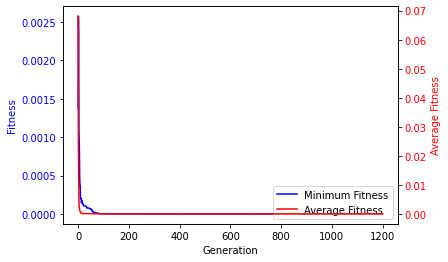

gen	nevals	avg      	std      	min       	max     
0  	30    	0.0363789	0.0322245	0.00113931	0.123776
1  	181   	0.0123742	0.0111169	0.00113931	0.0496208
2  	182   	0.00504554	0.00491516	0.000879351	0.0198288
3  	182   	0.00164447	0.00143107	0.000350511	0.00735167
4  	184   	0.000856533	0.00040745	0.000306453	0.00201626
5  	176   	0.000492506	0.000203905	0.00032546 	0.00113931
6  	182   	0.000325766	4.64839e-05	0.000210976	0.000414195
7  	181   	0.000274115	5.23572e-05	0.00017726 	0.000350511
8  	174   	0.000238432	3.54441e-05	0.000185444	0.00031698 
9  	177   	0.000202798	2.24699e-05	0.000159242	0.00025046 
10 	176   	0.000183621	2.01074e-05	0.000144304	0.000230284
11 	176   	0.000166333	1.54928e-05	0.00014196 	0.000189047
12 	169   	0.00015291 	1.29846e-05	0.000139695	0.000185444
13 	186   	0.000141469	1.30061e-06	0.000139072	0.000144304
14 	170   	0.000138754	9.75049e-06	8.67175e-05	0.000142008
15 	174   	0.000135469	1.30933e-05	8.67175e-05	0.00014196 
16 	179   	0.000130775	1.77198

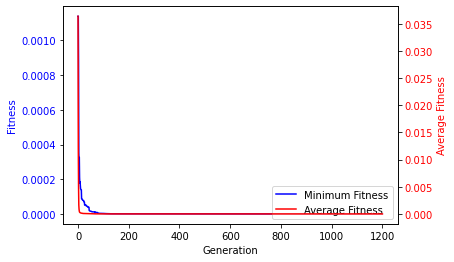

gen	nevals	avg      	std      	min       	max    
0  	30    	0.0607547	0.0604892	0.00457983	0.30422
1  	180   	0.0177948	0.0122286	0.00446026	0.0567537
2  	175   	0.00969973	0.00763746	0.00170134	0.0358106
3  	189   	0.00412589	0.00343636	0.00135421	0.0169575
4  	177   	0.00214395	0.00154261	0.000692145	0.00932921
5  	179   	0.00139265	0.000391995	0.000692145	0.00208736
6  	183   	0.00104411	0.000204657	0.000692145	0.00142189
7  	184   	0.000724825	0.000192676	0.000446797	0.00135992
8  	183   	0.000544805	0.000131826	0.000302135	0.000786748
9  	182   	0.00042425 	0.000103258	0.000220535	0.000665912
10 	186   	0.000292742	7.74239e-05	0.000208424	0.000431263
11 	183   	0.000218254	5.5469e-05 	0.000133914	0.000329021
12 	173   	0.000168777	3.55986e-05	0.000123736	0.000220535
13 	178   	0.000138884	2.17314e-05	9.51192e-05	0.000220535
14 	177   	0.000123679	1.3107e-05 	9.51192e-05	0.000134838
15 	179   	0.000115641	1.48575e-05	7.02007e-05	0.000133914
16 	186   	9.35715e-05	1.38392e-05	6.918

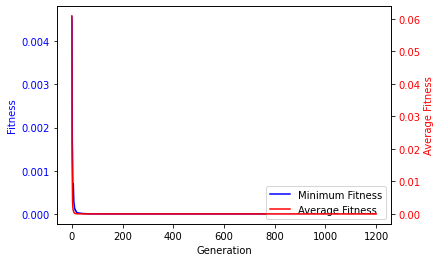

gen	nevals	avg      	std     	min      	max     
0  	30    	0.0804854	0.100148	0.0022736	0.424932
1  	179   	0.0274231	0.033928	0.00327016	0.153246
2  	183   	0.00820821	0.00558082	0.00232467	0.0247053
3  	184   	0.00531322	0.00316986	0.00165955	0.0136177
4  	177   	0.00284069	0.00114108	0.00120162	0.00645185
5  	181   	0.00200683	0.000792902	0.000874669	0.00467651
6  	180   	0.00121521	0.000463038	0.000589987	0.00293023
7  	183   	0.000791826	0.000219017	0.00038369 	0.00123929
8  	186   	0.000632176	0.000123028	0.00038369 	0.000874669
9  	177   	0.000488799	9.7699e-05 	0.000336106	0.00070249 
10 	183   	0.000395049	5.95589e-05	0.000295833	0.000529848
11 	185   	0.00033779 	5.00559e-05	0.000245689	0.000453053
12 	178   	0.000294752	5.02258e-05	0.000181737	0.000372942
13 	173   	0.000250684	5.28145e-05	0.000181737	0.00033675 
14 	175   	0.000208883	3.85757e-05	0.000168846	0.000322612
15 	182   	0.000185765	1.22722e-05	0.000168846	0.000223847
16 	186   	0.000175487	7.25196e-06	0.00015981

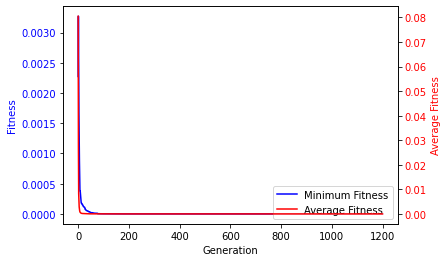

gen	nevals	avg      	std      	min       	max     
0  	30    	0.0404672	0.0383845	0.00247718	0.174475
1  	172   	0.0142313	0.00829411	0.00247072	0.0407506
2  	186   	0.00748147	0.00356754	0.00247072	0.0169894
3  	178   	0.00505567	0.00253934	0.00207804	0.0103379
4  	183   	0.00317707	0.00132049	0.00158722	0.00665917
5  	179   	0.00225804	0.000509035	0.00147971	0.00336945
6  	183   	0.00163468	0.000388532	0.000901894	0.0021933 
7  	176   	0.00123141	0.000360003	0.000737545	0.00205913
8  	187   	0.000982312	0.000304713	0.0005754  	0.00167015
9  	179   	0.000699639	0.000182428	0.000396125	0.0010793 
10 	174   	0.000508274	0.000124238	0.000287794	0.000794222
11 	174   	0.000383898	9.78257e-05	0.000261335	0.000662766
12 	182   	0.000309812	5.26467e-05	0.000231471	0.000465563
13 	179   	0.000263036	2.59223e-05	0.000228534	0.000338176
14 	180   	0.000243765	1.51315e-05	0.000228534	0.000274283
15 	179   	0.000231937	9.15295e-06	0.000216794	0.0002615  
16 	186   	0.000224598	7.14256e-06	0.00019

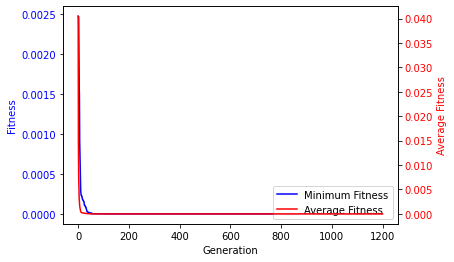

In [ ]:
def main():
    random.seed()
    MU, LAMBDA = 30, 200
    pop = toolbox.population(n=MU)
    hof = tools.HallOfFame(1)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", numpy.mean)
    stats.register("std", numpy.std)
    stats.register("min", numpy.min)
    stats.register("max", numpy.max)
    
    pop, logbook = algorithms.eaMuCommaLambda(pop, toolbox, mu=MU, lambda_=LAMBDA, 
        cxpb=0.6, mutpb=0.3, ngen=1200, stats=stats, halloffame=hof, verbose=True)

    gen, fit_mins, size_avgs  = logbook.select("gen", "min", "avg")

    fig, ax1 = plt.subplots()
    line1 = ax1.plot(gen, fit_mins, "b-", label="Minimum Fitness")
    ax1.set_xlabel("Generation")
    ax1.set_ylabel("Fitness", color="b")
    for tl in ax1.get_yticklabels():
      tl.set_color("b")

    ax2 = ax1.twinx()
    line2 = ax2.plot(gen, size_avgs, "r-", label="Average Fitness")
    ax2.set_ylabel("Average Fitness", color="r")
    for tl in ax2.get_yticklabels():
      tl.set_color("r")

    lns = line1 + line2
    labs = [l.get_label() for l in lns]
    ax1.legend(lns, labs, loc="lower right", frameon=True)

    plt.show()    
    
    return pop, logbook, hof
    
if __name__ == "__main__":
    for i in range(5):
       main()